In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime  # convert time into strings
from datetime import timedelta # allows us to do calculations with dateandtime
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX  #
register_matplotlib_converters()
from time import time

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
path = "/content/drive/MyDrive/Dataset/walmart-sales-dataset.csv"
dataset_walmart = pd.read_csv(path)
dataset_walmart.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
0,5/2/2010,1643690.90,0,42.31,2.572
1,12/2/2010,1641957.44,1,38.51,2.548
2,19-02-2010,1611968.17,0,39.93,2.514
3,26-02-2010,1409727.59,0,46.63,2.561
4,5/3/2010,1554806.68,0,46.50,2.625


In [56]:
print(type(dataset_walmart.dtypes)) #dtype only exist only on pandas

<class 'pandas.core.series.Series'>


In [57]:
dataset_walmart

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
0,5/2/2010,1643690.90,0,42.31,2.572
1,12/2/2010,1641957.44,1,38.51,2.548
2,19-02-2010,1611968.17,0,39.93,2.514
3,26-02-2010,1409727.59,0,46.63,2.561
4,5/3/2010,1554806.68,0,46.50,2.625
...,...,...,...,...,...
138,28-09-2012,1437059.26,0,76.08,3.666
139,5/10/2012,1670785.97,0,68.55,3.617
140,12/10/2012,1573072.81,0,62.99,3.601
141,19-10-2012,1508068.77,0,67.97,3.594


In [58]:
dataset_walmart['Month'] = pd.to_datetime(dataset_walmart['Date']).dt.month

<ipython-input-58-4f066a1bc019>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset_walmart['Month'] = pd.to_datetime(dataset_walmart['Date']).dt.month


In [59]:
dataset_walmart['Date'] = dataset_walmart['Date'].str.replace('-','/')

In [60]:
dataset_walmart['Date'] = pd.to_datetime(dataset_walmart['Date'], format='%d/%m/%Y', errors='coerce')

In [61]:
dataset_walmart

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Month
0,2010-02-05,1643690.90,0,42.31,2.572,5
1,2010-02-12,1641957.44,1,38.51,2.548,12
2,2010-02-19,1611968.17,0,39.93,2.514,2
3,2010-02-26,1409727.59,0,46.63,2.561,2
4,2010-03-05,1554806.68,0,46.50,2.625,5
...,...,...,...,...,...,...
138,2012-09-28,1437059.26,0,76.08,3.666,9
139,2012-10-05,1670785.97,0,68.55,3.617,5
140,2012-10-12,1573072.81,0,62.99,3.601,12
141,2012-10-19,1508068.77,0,67.97,3.594,10


In [62]:
print(dataset_walmart.dtypes)

Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
Month                    int64
dtype: object


In [63]:
df =pd.DataFrame({'Date': dataset_walmart['Date'], 'Weekly_Sales': dataset_walmart['Weekly_Sales']})

In [64]:
print(dataset_walmart.dtypes)

Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
Month                    int64
dtype: object


Text(0.5, 0, 'Date')

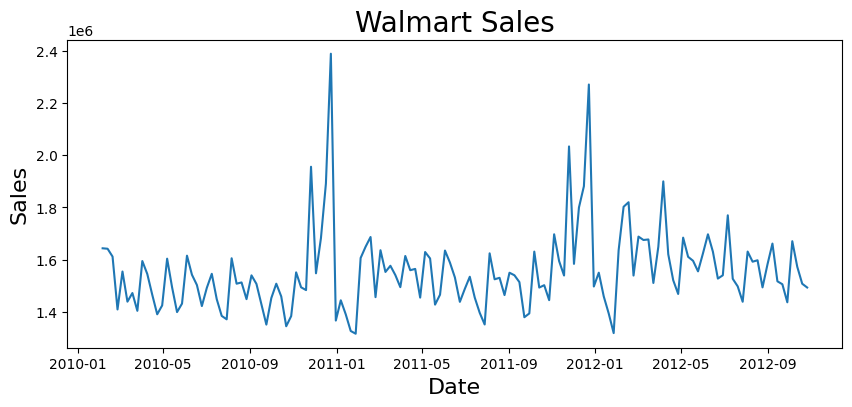

In [65]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['Weekly_Sales'])
plt.title('Walmart Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)

In [68]:
df = df.set_index(['Date'])

In [69]:

start_date = datetime(2010,6,1)
end_date = datetime(2012,6,1)
df = df[start_date:end_date]

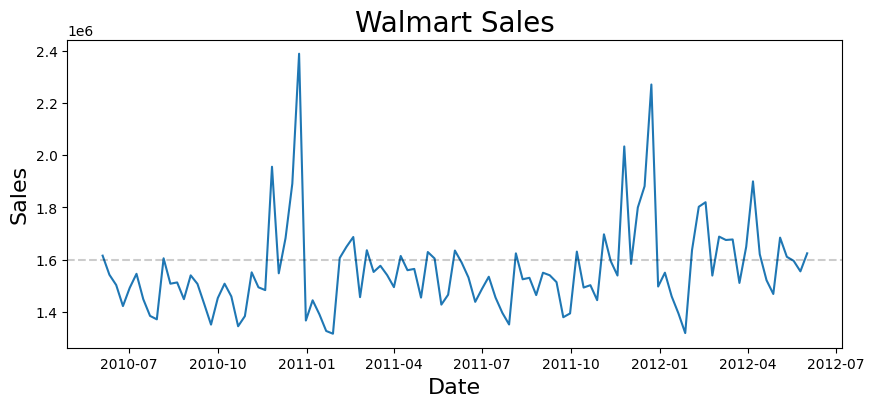

In [71]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Walmart Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
# plt.ylim(0, 10000)
plt.axhline(1600000, color='k', linestyle='--', alpha=0.2)

In [72]:
train_end = datetime(2012,4,1)
test_end = datetime(2012,5,25)
train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [83]:
my_order = (1,1,0)
my_seasonal_order = (0, 1, 1, 4)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [84]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.08973503112792969


In [85]:
#summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 4)   Log Likelihood               -1246.065
Date:                             Thu, 28 Mar 2024   AIC                           2498.131
Time:                                     10:27:11   BIC                           2505.663
Sample:                                 06-04-2010   HQIC                          2501.169
                                      - 03-30-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2959      0.109     -2.709      0.007      -0.510      -0.082
ma.S.L4       -0.8225      

In [86]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Production')

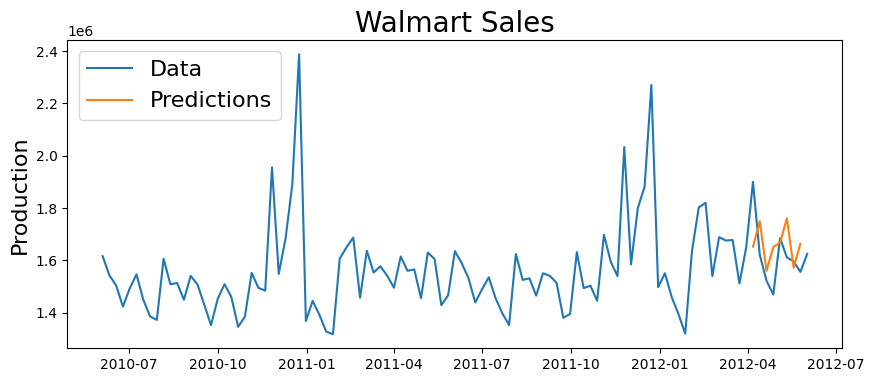

In [87]:
plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Walmart Sales', fontsize=20)
plt.ylabel('Production', fontsize=16)